### train 1k와 test 1k <- SVM

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
import pandas as pd
train = pd.read_csv("../Data/train_1k.csv", header=None)
test = pd.read_csv("../Data/test_1k.csv", header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
train[0].describe()

count    1001.000000
mean        4.447552
std         2.883313
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: 0, dtype: float64

In [80]:
# tran[0]의 숫자 빈도
train[0].value_counts() # train[0]의 0은 타겟컬럼이다.
# 인덱스 0번이 손글씨 숫자 0 이다.
# 인덱스의 번호는 data에 표현한 라벨이다.

7    117
1    116
4    105
9    100
2     99
0     98
6     94
3     93
5     92
8     87
Name: 0, dtype: int64

In [81]:
train_data = train.iloc[:,train.columns !=0]
train_label =  train.iloc[:, train.columns ==0]


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# train data의 내용 보기
import numpy as np
temp = np.array(train.loc[0, train.columns != 0])
print(temp.reshape(28, 28))
# 데이터가 커서 잘알보임

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [83]:
# train data 의 내용 줄이기 (잘보기위해)
tempColumns =[]
temp1 =temp.reshape(28, 28)
count = 0

for i in range(0,29):
    if i % 2 ==1:
        for j in range (0,29):
            if j % 2 == 1:
                tempColumns.append(temp1[i,j])
                count +=1
count

196

In [84]:
print(np.array(tempColumns).reshape(14, 14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [85]:
test_data = test.iloc[:,test.columns !=0]
test_label =  test.iloc[:, test.columns ==0]
test_label.head()

,0
0,7
1,2
2,1
3,0
4,4


In [86]:
# 학습하기
from sklearn import svm
clf =svm.SVC()
clf.fit(train_data,train_label)

SVC()

In [87]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
clf.score(test_data, test_label)

0.8751248751248751

--- 
### train 1k 와 test 1k <- SVM, Log

In [89]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
len(train_data),len(test_data)

(1001, 1001)

In [92]:
# 시각화를 통한 Log에 필요성 확인
import matplotlib.pyplot as plt

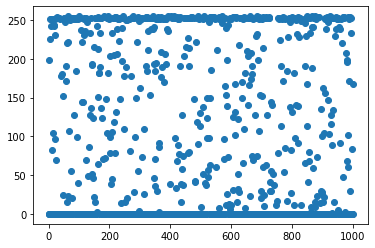

In [93]:
plt.scatter(train_data.index, train_data[300])
plt.show()
#선을 그릴 수 가없다. 이렇게 퍼진데이터를 정리하기위해 Log를사용한다.

### 로그변환이유
 : 로그는 태생적으로 큰값을 작게 표기하기위해 고안된 방법이며, 측정단위를 키우는 것만으로도 해결하지 못한 부분을 해결해준다.

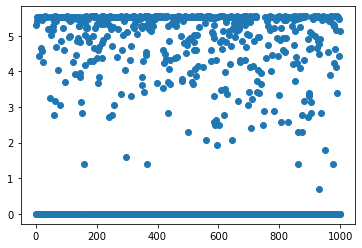

In [94]:
plt.scatter(train_data.index, np.log1p(train_data[300]))
plt.show()

### np.log1p
기본적으로 log안의 x값은 양수만 가능하다.        
하지만 0에 가까운 아주 작은 양수 (예: 0.000000000001)         
음의 무한대에 가까워지게된다. (-inf)           
이를 방지하기 위해 1을 더함으로써 0보다 큰 양수릐 값을 갖게 된다.        

In [95]:
# Data 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data,train_label)

SVC()

In [98]:
clf.score(test_data,test_label)

0.8901098901098901

In [107]:
train_10 = pd.read_csv("../Data/train_10k.csv",header=None)
train_20 = pd.read_csv("../Data/train_20k.csv",header=None)
train_10.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
train_data = train_10.iloc[:,train_10.columns !=0]
train_label =  train_10.iloc[:, train_10.columns ==0]


In [111]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
train[0].describe()

count    1001.000000
mean        4.447552
std         2.883313
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: 0, dtype: float64

In [113]:
train[0].value_counts()

7    117
1    116
4    105
9    100
2     99
0     98
6     94
3     93
5     92
8     87
Name: 0, dtype: int64

In [122]:
wow = np.array(train_10.loc[0,train_10.columns !=0])
print(wow.reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [125]:
tempColumns =[]
wow2 =wow.reshape(28, 28)
count = 0

for i in range(0,29):
    if i % 2 ==1:
        for j in range (0,29):
            if j % 2 == 1:
                tempColumns.append(wow2[i,j])
                count +=1
count

196

In [ ]:
#### #############################################숫자보이게 해보기 숙제!!!!


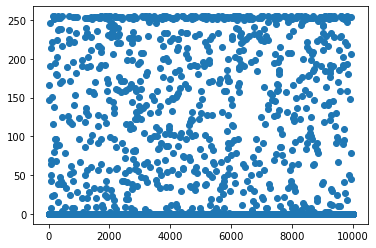

In [117]:
plt.scatter(train_data.index, train_data[100])
plt.show()

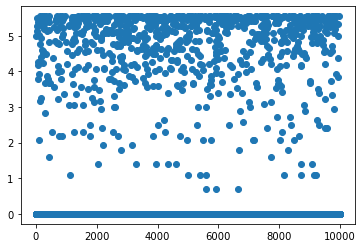

In [124]:
plt.scatter(train_data.index, np.log1p(train_data[100]))
plt.show()